將全部特徵放入, 用RF 列出所有特徵的重要性及匯出圖

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering  import
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder ,OrdinalEncoder
from imblearn.over_sampling import SMOTE

# Model import
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluate import
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score ,roc_curve ,classification_report, confusion_matrix

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option("display.precision", 2)
plt.rcParams['axes.unicode_minus'] = False # 正常顯示負號

# EDA
讀取資料，做資料探索

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/大三/下學期/機器學習應用/Datasets/ Bank Marketing/bank-full.csv' ,sep =';')

df # 45211 rows × 17 columns

In [ ]:
df.info()

# Feature Engineering
將特徵和標籤做特徵工程轉換

In [ ]:
# 標籤y做LabelEncoder
lb_encoder = LabelEncoder()
df['y'] = lb_encoder.fit_transform(df['y'])
# Original values for column 'y': ['no' 'yes']
# Encoded values for column 'y': [0 1]

# 類別特徵欄位做OrdinalEncoder
cat_columns = df.select_dtypes(include='object').columns
or_encoder = OrdinalEncoder()
df[cat_columns] = or_encoder.fit_transform(df[cat_columns])

In [ ]:
df

# Train Test Split
資料分割，將資料集拆分為訓練集和測試集

In [ ]:
X = df.drop(columns=['y'])
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', X_train.shape)
print('y_test:', X_test.shape)
print('='*30)
# 查看全部資料的類別比例
print(pd.Series(y).value_counts(normalize=True))
# 查看訓練集標籤的分佈
print(pd.Series(y_train).value_counts(normalize=True))
# 查看測試集的標籤分佈
print(pd.Series(y_test).value_counts(normalize=True))

# Model

In [ ]:
rfclf_model = RandomForestClassifier(n_estimators=100 ,random_state=42)

rfclf_model.fit(X_train, y_train)

# Feature_Importances

In [ ]:
importances = rfclf_model.feature_importances_

feature_scores = pd.Series(rfclf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

In [ ]:
plt.figure(figsize=(10, 6))
feature_scores.plot(kind='bar', color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

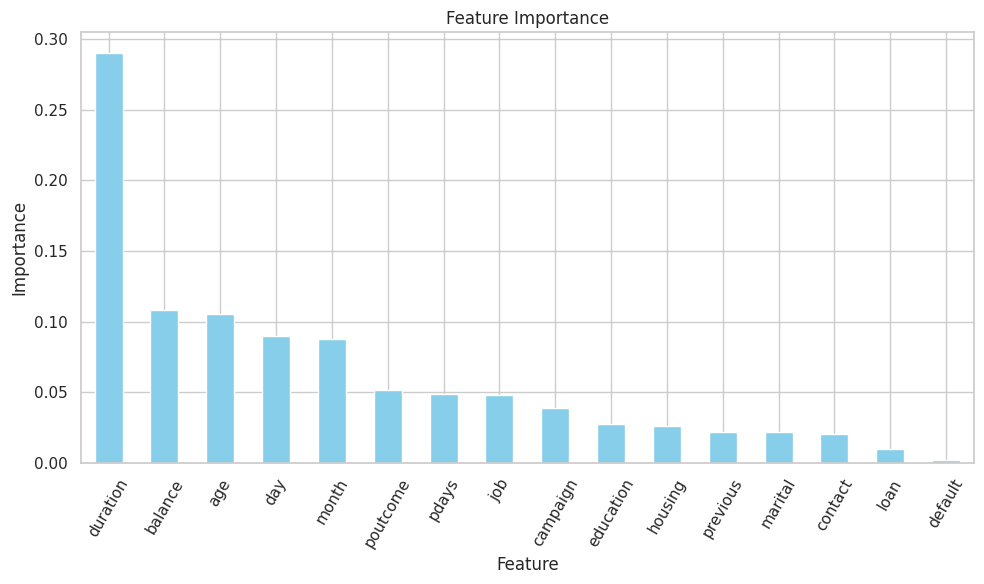

圖表得知特徵重要性前五高依序為

1.   duration : 0.29
2.   balance : 0.108
3.   age : 0.105
4.   day : 0.897
5.   month : 0.874

In [ ]:
# 後續可取特徵重要性的特徵來做訓練
selected_features = ['duration', 'balance', 'age', 'day', 'month']
X = df[selected_features]
y = df['y']